In [2]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_excel('maliciousornot.xlsx')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [12]:
y=df['Type']
x=df.drop('Type',axis=1)
x=x.astype('float64')
y=y.astype('float64')

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
model=Sequential()

In [18]:
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [19]:
model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test),verbose=1,batch_size=50)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6117 - loss: 0.6838 - val_accuracy: 0.6091 - val_loss: 0.6787
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6225 - loss: 0.6744 - val_accuracy: 0.6091 - val_loss: 0.6721
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5901 - loss: 0.6748 - val_accuracy: 0.6091 - val_loss: 0.6675
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6062 - loss: 0.6660 - val_accuracy: 0.6091 - val_loss: 0.6639
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6235 - loss: 0.6541 - val_accuracy: 0.6091 - val_loss: 0.6609
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6440 - loss: 0.6393 - val_accuracy: 0.6091 - val_loss: 0.6572
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6185 - loss: 0.6471 - val_accuracy: 0.6091 - val_loss: 0.6517
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6014 - loss: 0.6508 - val_accuracy: 0.6091 - val_loss: 0.645

<Axes: >

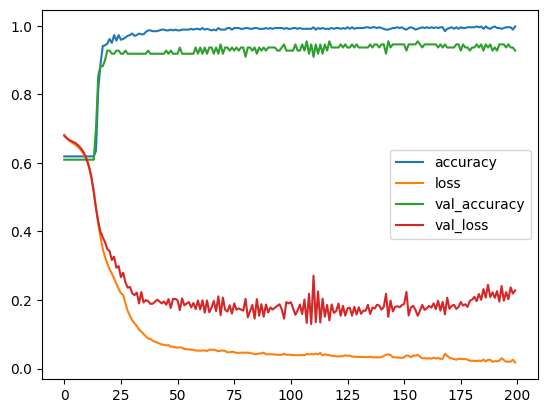

In [20]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [21]:
earlyStopping=EarlyStopping(monitor='val_loss',patience=20)
model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test),verbose=1,batch_size=50,callbacks=[earlyStopping])

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9990 - loss: 0.0095 - val_accuracy: 0.9455 - val_loss: 0.2164
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9995 - loss: 0.0142 - val_accuracy: 0.9455 - val_loss: 0.2191
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9925 - loss: 0.0198 - val_accuracy: 0.9182 - val_loss: 0.2397
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9968 - loss: 0.0190 - val_accuracy: 0.9273 - val_loss: 0.2307
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9976 - loss: 0.0125 - val_accuracy: 0.9273 - val_loss: 0.2460
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9964 - loss: 0.0163 - val_accuracy: 0.9364 - val_loss: 0.2260
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9909 - loss: 0.0178 - val_accuracy: 0.9273 - val_loss: 0.2448
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9976 - loss: 0.0145 - val_accuracy: 0.9273 - val_loss: 0.2

<Axes: >

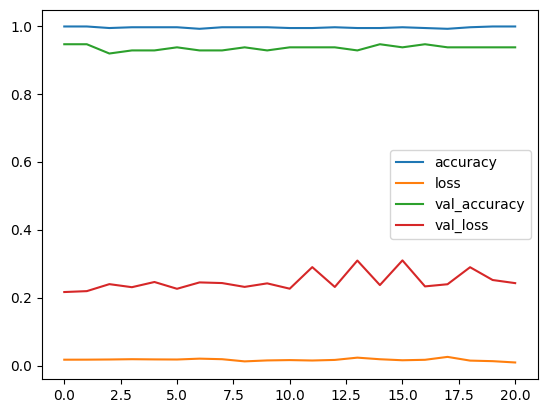

In [22]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [25]:
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test),verbose=1,batch_size=50,callbacks=[earlyStopping])

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.4787 - loss: 0.6977 - val_accuracy: 0.6091 - val_loss: 0.6877
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5314 - loss: 0.6907 - val_accuracy: 0.6091 - val_loss: 0.6836
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5855 - loss: 0.6844 - val_accuracy: 0.6091 - val_loss: 0.6808
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5879 - loss: 0.6839 - val_accuracy: 0.6091 - val_loss: 0.6783
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6257 - loss: 0.6754 - val_accuracy: 0.6091 - val_loss: 0.6755
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6225 - loss: 0.6757 - val_accuracy: 0.6091 - val_loss: 0.6732
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6531 - loss: 0.6668 - val_accuracy: 0.6091 - val_loss: 0.6712
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6271 - loss: 0.6694 - val_accuracy: 0.6091 - val_loss:

<Axes: >

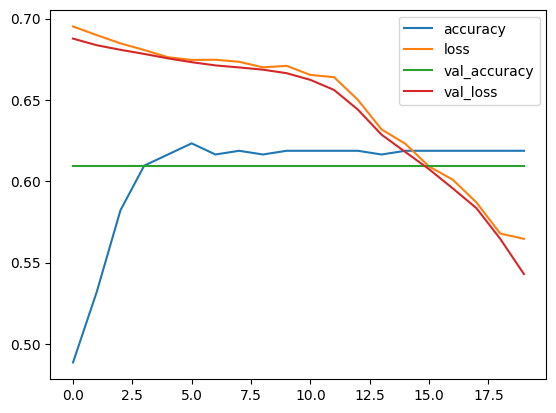

In [26]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=model.predict(x_test)    
y_pred=(y_pred>0.5)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76        67
         1.0       0.00      0.00      0.00        43

    accuracy                           0.61       110
   macro avg       0.30      0.50      0.38       110
weighted avg       0.37      0.61      0.46       110

[[67  0]
 [43  0]]


C:\Users\Alper\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Alper\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Alper\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i